In [2]:
import pickle
import glob
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import pandas as pd

In [6]:
infos = []
idx_tups = []
for file in glob.glob("../../data/cifar/cifar_f*"):
    fd = pickle.load(open(file, 'rb'))
    #print(file, type(infos[-1]))
    var = file.split("_")[-4:]
    print(var)
    a, y, m = max([(a, yt - yf, mt  - mf) for a, yt, yf, mt, mf in zip(fd['acc'], fd['yeom_tpr'], fd['yeom_fpr'], fd['merlin_tpr'], fd['merlin_fpr'])])
    fd['accs'] = a
    fd['adv'] = y
    fd['merlin_adv'] = m

    var[-1] = int(var[-1].split(".")[0])
    var[-3] = int(var[-3])
    var[-2] = float(var[-2]) if var[-2] != 'False' else False
    # IDX tups follow the format (epsilon, throw out threshold, batch size)
    idx_tups.append(var)
    infos.append(fd)

['f', '0', '0', '64.b']
['f', '50000', '0', '64.b']
['f', '10000', '0', '64.b']
['f', '100000', '0', '64.b']
['f', '1000', '0', '64.b']


In [7]:
inf_scalars = [(i[0]['accs'], i[0]['adv'][-1] if type(i[0]['adv']) == list else i[0]['adv'],  i[0]['merlin_adv'][-1][0] if type(i[0]['merlin_adv']) == list else i[0]['merlin_adv'], *i[1]) for i in zip(infos, idx_tups)]
ds = pd.DataFrame(inf_scalars)
ds.columns = ['acc', 'yeom', 'merlin', 'method', 'epsilon', 'throw out', 'batch_size']

In [8]:
def plot_noise_results(df, base=None, title=""):
    epsilons = df['epsilon']
    acc = df['acc']
    adv = df['yeom']
    
    if base is not None:
        base_acc = [float(base['acc']) for i in epsilons]    
        base_adv = [float(base['yeom']) for i in epsilons]
    plt.figure()

    ax1 = plt.gca()
    _ = ax1.plot(epsilons, 
                                       acc,  
                                       color='b', 
                                       alpha=.8)
    ax1.set_ylabel('Accuracy', color='b')
    ax1.tick_params('x', colors='b')
    
    if base is not None:
            _ = ax1.plot(epsilons, base_acc,  
                                       '--',
                                       color='b', 
                                       alpha=.8)

    ax2 = ax1.twinx()
    _ = ax2.plot(epsilons, 
                                       adv, 
                                       color='r')

    ax2.set_ylabel('Membership Inference Adv', color='r')
    ax2.tick_params('x', colors='r')
    
    if base is not None:
            _ = ax2.plot(epsilons, base_adv, 
                                       '--',
                                       color='r', 
                                       alpha=.8)


    ax1.set_xlabel('Epsilon (delta = 1e-5)')
    ax1.set_title(title)
    #fig.tight_layout()
    
    plt.xscale('log')
    plt.show() 

In [9]:
iss = ds[(ds['epsilon'] != 0)].sort_values('epsilon')
base = ds[ds['epsilon'] == 0]

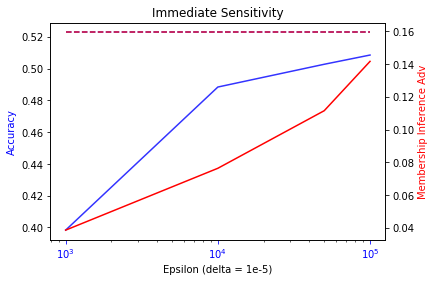

In [10]:
plot_noise_results(iss, base, 'Immediate Sensitivity')